### HOMEWORK 7
- Fullname: Phạm Vân Thư
- Class: DSEB65A
- Student ID: 11230592

**Exercise 1: Reverse Words in a Sentence (1.5 point)**  
Given an input sentence (string), use regex to find and extract words and reverse each word in the sentence.  
Requirements:  
1.	Use `re.sub` to find and extract words from the input sentence.
2.	Lowercase words.
3.	Use string slicing to reverse each word.
4.	Use `re.sub` to replace the original words with the reversed words in the sentence.  
Example:    
•	Input: "This is a sample sentence."  
•	Expected output: "siht si a elpmas ecnetnes."


In [19]:
sentence = input("Enter a sentence: ")
# sentence = "This is a sample sentence"
###1
import re
words = re.split(r'\s',sentence)
words

###2
lower_words = [word.lower() for word in words]
lower_words

###3
reserved_words = [word[::-1] for word in lower_words]
reserved_sentence = re.sub(r'\s',' ', ' '.join(reserved_words))
print(reserved_sentence)


hdiehuh hfieuhè


**Exercise 2: Calculate Total Amount from a Bill (1.5 point)**  
Given a bill in string format, use regex to extract the prices and calculate the total amount.  
Example bill format:  
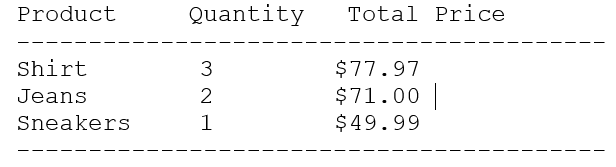  
Expected output: “Total Amount: $423.9”.

In [20]:
import re
bill = '''
Product     Quantity   Total Price
-----------------------------------------
Shirt		3	         $77.97 
Jeans 	    2 	         $71.00 
Sneakers 	1 	         $49.99
-----------------------------------------
'''
#tìm price
prices = re.findall(r'\d+.\d+\b',bill)
quantity = re.findall(r'\b\d+\b(?=\s+\$)',bill)
#tính tổng
total = 0
for i in range(len(prices)):
    total += float(prices[i])*int(quantity[i])
print(f"Total Amount: ${total:.1f}")


Total Amount: $425.9


**Exercise 3: Validate Email Addresses (1.5 point)**  
Use regex to validate whether the following email addresses are valid based on these rules:  
1.	Starts with a non-numeric character.  
2.	Contains an "@" character.
3.	Is followed by a valid domain name (letters, numbers, underscores).
4.	Ends with a valid TLD (".com", ".org", ".edu", ".net").  
Count and save (in an array) valid emails in the following list:    
>email_list = [  
    'john.doe@example.com',   
    'jane_doe@sub.example.co.uk',   
    'invalid_email',   
    'user@.com',   
    'admin@123.45.678.90',   
    'alice.smith@gmail.com',   
    'james.wilson@company.org',   
    'invalid.email@',   
    'user@domain',   
    'name.lastname@example.co.uk',   
    'john.doe@company.com',   
    '12345@example.com',   
    'user@invalid..com',   
    'user@com',   
    'name.lastname@company.co.uk',   
    'user@domain@company.com',   
    'user@company..com',   
    'user@domain@.com',   
    'user@company.com@example.co.uk',   
    'user@domain@com@example.co.uk'  
]  

Expected Output: There are (number of mail you count): [“email1”, “email2”,…]


In [21]:
email_list = [
    'john.doe@example.com',   
    'jane_doe@sub.example.co.uk',   
    'invalid_email',   
    'user@.com',   
    'admin@123.45.678.90',   
    'alice.smith@gmail.com',   
    'james.wilson@company.org',   
    'invalid.email@',   
    'user@domain',   
    'name.lastname@example.co.uk',   
    'john.doe@company.com',   
    '12345@example.com',   
    'user@invalid..com',   
    'user@com',   
    'name.lastname@company.co.uk',   
    'user@domain@company.com',   
    'user@company..com',   
    'user@domain@.com',   
    'user@company.com@example.co.uk',   
    'user@domain@com@example.co.uk' ]
email_pattern = r'^[a-zA-Z][\w_.]*@[\w_0123456789]+(.com|.org|.edu|.net)$'
emails = [email for email in email_list if re.match(email_pattern, email)]
print (f"There are {len(emails)}: {emails}")

There are 4: ['john.doe@example.com', 'alice.smith@gmail.com', 'james.wilson@company.org', 'john.doe@company.com']


**Exercise 4: Date Format (1.5 point)**  
Write a regex to match dates in the format of DD/MM/YYYY or DD-MM-YYYY, ensuring the day is from 01 to 31, the month is from 01 to 12, and the year is a four-digit number.   

Example Input:    
- Valid: 01/02/2024  
- Invalid: 11/31/2001    

Expected Output:  
- Valid: 01/02/2024: true  
- Invalid: 11/31/2001: false   


In [22]:
import re
date = input("Enter a date: ")
valid = False
date_pattern1 = r'^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[0-2])/[0-9]{4}$'
date_pattern2 = r'^(0[1-9]|[12][0-9]|3[01])-(0[1-9]|1[0-2])-[0-9]{4}$'
if re.match(date_pattern1, date) or re.match(date_pattern2, date):
    valid = True
if valid :
    print(f"{date}: true")
else:
    print(f"{date}: false")

21/05/2005: true


**Exercise 5: (4 points)**   
You are provided with a statement file from MTTQVN (Vietnam Fatherland Front) for the period from 01/09/2024 to 10/09/2024. You will be given code to read data from the PDF into text format (List of text). However, the text format from the PDF is quite poor. Please use regex and some other methods to process and extract information from the statement. 

Requirements: 
-	Extract transaction information such as date, amount, and content 
-	Calculate the total, average, and variance of the transactions 
-	Count the number of transactions >= 500,000 VND 
-	Search for transactions if it contains some string  

Scoring: 
-	Process and extract simple transactions in first 20 pages (2 points) 
-	Obtain all transfer content from users (+1 point) 
-	Process and extract various types of transactions (+1 point) (Hint: Identify different cases and handle them) 
-	Process the entire dataset (bonus 1 point) 

Notes: 
-	Due to some technical issues, we will temporarily skip the first page. 
-	Only record transactions >= 1,000 
-	Simple transactions: The "Balance" column has no data; the rest are complex transaction

In [7]:
# !pip install pypdf 
# !pip install langchain_community 

from langchain_community.document_loaders.pdf import PyPDFLoader   

pdf_file_path = r"D:\Jupyter Notebool\Python\Homework\Thong tin ung ho qua TSK VCB 0011001932418 tu 01.09 den10.09.2024.pdf" 
pdf_loader = PyPDFLoader(pdf_file_path)
contents = pdf_loader.load()   
texts = [content.page_content for content in contents]   
texts = texts[1:] # for first 20 pages 
print(texts)
# with open("saoke.txt","w", encoding="utf-16") as f:
#     f.write("\n".join(texts))
#     f.close()



In [71]:
import re

transaction_pattern = r'(\d{2}/09/2024)\n(\d+\.\d+)\s+(\d+[\d+\.]+)\s*+(\d{2}\.\d{3}\.\d{3}\.\d{3})?\s*(\w+[\s\w.]+)(?=\n\d{2}/09/2024)'
transaction = []
date, tnx, credit, balance, detail = [], [], [], [], []
for page in texts:
    transaction += re.findall(transaction_pattern, page)
for i in transaction:
    date, tnx, credit, balance, detail = zip(*transaction)
    i = list(i)
    i[4] = re.sub(r'\n','',i[4])
    i = tuple(i)
    print(f"Date: {i[0]}\nTransaction: {i[1]}\nCredit: {i[2]}\nBalance: {i[3]}\nDetail: {i[4]}")
    print("=====================================")

Date: 04/09/2024
Transaction: 5017.11310
Credit: 12.000
Balance: 
Detail: 689894.040924.130615.HUA THI HONG DUYEN chuyen tien
Date: 04/09/2024
Transaction: 5216.73639
Credit: 30.000
Balance: 
Detail: 443384.040924.145449.Nguyen Van Linh nmhs
Date: 04/09/2024
Transaction: 5216.12489
Credit: 3.000
Balance: 
Detail: 438636.040924.150454.NGUYEN THI HONG TRANG chuyen tien
Date: 04/09/2024
Transaction: 5215.25299
Credit: 3.000
Balance: 
Detail: 754108.040924.150808.NGUYEN THI VAN ANH chuyen tien
Date: 04/09/2024
Transaction: 5215.51322
Credit: 3.000
Balance: 
Detail: 546454.040924.160556.NGUYEN THI HONG TRANG chuyen tien
Date: 04/09/2024
Transaction: 5216.13764
Credit: 3.000
Balance: 
Detail: 662918.040924.162101.CAO THI THUY Chuyen tien
Date: 04/09/2024
Transaction: 5209.24113
Credit: 200.000
Balance: 
Detail: 578070.040924.162317.VO THI NGA chuyen tien
Date: 04/09/2024
Transaction: 5389.59355
Credit: 200.000
Balance: 
Detail: 020097042209041633462024B97G818420.59355.163348.W.O t9
Date: 04/

In [51]:
credit = [i.replace('.', '') for i in credit]
total_credit = sum([float(i) for i in credit])
avr_credit = total_credit/len(credit)
var_credit = sum([(float(i)-avr_credit)**2 for i in credit])/len(credit)
print(f"Total: {total_credit:,}\nAverage: {avr_credit:,.2f}\nVariance: {var_credit:,.2f}")


Total: 127,777,999.0
Average: 694,445.65
Variance: 54,023,669,577,001.52


In [18]:
k_credit = 0

for i in credit:
    if float(i) > 500000:
        k_credit +=1
print(f"Number of transactions with credit > 500.000: {k_credit}")

Number of transactions with credit > 500.000: 20613


In [46]:
string = "tien"
str_count = 0

for i in transaction:
    for j in i:
        if re.search(string,j):
            str_count += 1
            print(i)
print(f"Number of transactions with detail containing 'tien': {str_count}")

('01/09/2024', '5215.97152', '3.000', '', '267515.010924.122904.NGUYEN THI MAO \nChuyen tien')
('03/09/2024', '5216.79404', '370.000', '', '524035.030924.111445.IBFT TRAN THI MY \nPHUONG chuyen tien')
('03/09/2024', '5017.43849', '9.000', '', '888828.030924.121121.NGUYEN THI KIEU \nOANH chuyen tien')
('03/09/2024', '5216.95779', '12.000', '10.849.014.843', '633739.030924.184314.NGUYEN VAN LINH \nChuyen tien')
('04/09/2024', '5213.16917', '20.000', '', '718788.040924.001536.LE THI MY HANH \nchuyen tien')
('04/09/2024', '5215.70219', '6.000', '', '563774.040924.092651.PHAM THI THAO \nchuyen tien')
('04/09/2024', '5220.4615', '3.000', '', '429224.040924.100236.NGUYEN THI NGOC \nLE chuyen tien')
('04/09/2024', '5215.56651', '3.000', '', '786355.040924.101558.PHAM DUY AN \nchuyen tien')
('04/09/2024', '5218.4587', '3.000', '', '535425.040924.102817.NGUYEN THI NGOC \nLE chuyen tien')
('04/09/2024', '5212.38625', '6.000', '', '589169.040924.104213.NGUYEN DINH CONG \nChuyen tien')
('04/09/2024